In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
import pandas.api.types as at
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))
import xgboost as xgb
import lightgbm as lgb
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from catboost import Pool, CatBoostRegressor, cv

In [2]:
data = pd.read_csv('data12.csv')
sample_submission = pd.read_csv('sample_submission.csv')
train = pd.read_csv('yy.csv')
#data.drop(['Unnamed: 0','model_name'],axis=1,inplace=True)
data.drop('Unnamed: 0',axis=1,inplace=True)
X = data.query('sample == 1').drop(['sample'], axis=1)
y = train['price']
X_sub = data.query('sample == 0').drop(['sample'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229113 entries, 0 to 229112
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   brand                229113 non-null  int64  
 1   color                229113 non-null  int64  
 2   engineDisplacement   229113 non-null  float64
 3   enginePower          229113 non-null  float64
 4   fuelType             229113 non-null  int64  
 5   mileage              229113 non-null  int64  
 6   modelDate            229113 non-null  int64  
 7   numberOfDoors        229113 non-null  int64  
 8   productionDate       229113 non-null  int64  
 9   vehicleTransmission  229113 non-null  int64  
 10  vendor               229113 non-null  int64  
 11  Владельцы            229113 non-null  int64  
 12  ПТС                  229113 non-null  int64  
 13  Привод               229113 non-null  int64  
 14  Руль                 229113 non-null  int64  
 15  bodyType2        

In [3]:
X_train

,brand,color,engineDisplacement,enginePower,fuelType,mileage,modelDate,model_name,numberOfDoors,productionDate,...,vendor,Владельцы,ПТС,Привод,Руль,bodyType2,bT_length,Nalog,years_old,age_intervals
206754,1,12,2.2,170.0,0,290000,2001,62,5,2003,...,6,2,1,0,0,7,15,7650.0,18,3
35012,0,13,1.4,75.0,0,220000,2000,90,5,2001,...,6,2,0,1,0,9,13,900.0,20,3
56108,12,13,2.0,136.0,0,229000,2004,429,4,2004,...,6,2,0,1,0,6,5,4760.0,17,3
124523,0,1,2.0,249.0,0,30000,2017,787,5,2020,...,2,2,1,2,0,1,17,18675.0,1,0
106609,10,2,1.6,110.0,0,90000,2014,756,4,2015,...,6,0,1,1,0,6,5,2750.0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154565,12,8,2.3,238.0,0,82336,2009,321,5,2011,...,3,1,1,2,0,1,17,17850.0,10,2
138380,12,16,1.6,115.0,0,230000,2005,428,3,2006,...,0,2,0,1,0,8,13,2875.0,15,3
166618,12,16,2.9,440.0,0,5691,2017,230,5,2020,...,2,0,1,2,0,1,17,66000.0,1,0
181553,10,1,1.6,110.0,0,103000,2014,756,4,2016,...,2,0,1,1,0,6,5,2750.0,5,1


In [20]:
num_cols = ['modelDate', 'numberOfDoors',
 'productionDate',
 'engineDisplacement',
 'enginePower',
 'mileage',
 'Владельцы',
 'bT_length',
 'Nalog',
 'years_old']

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.transform(X_test[num_cols])
X_sub[num_cols] = sc.transform(X_sub[num_cols])

<ipython-input-21-289b3a00dd17>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_cols] = sc.fit_transform(X_train[num_cols])
C:\Users\ragec\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-21-289b3a00dd17>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [33]:
X_train

,brand,color,engineDisplacement,enginePower,fuelType,mileage,modelDate,model_name,numberOfDoors,productionDate,...,vendor,Владельцы,ПТС,Привод,Руль,bodyType2,bT_length,Nalog,years_old,age_intervals
206754,1,12,2.2,170.0,0,290000,2001,62,5,2003,...,6,2,1,0,0,7,15,7650.0,18,3
35012,0,13,1.4,75.0,0,220000,2000,90,5,2001,...,6,2,0,1,0,9,13,900.0,20,3
56108,12,13,2.0,136.0,0,229000,2004,429,4,2004,...,6,2,0,1,0,6,5,4760.0,17,3
124523,0,1,2.0,249.0,0,30000,2017,787,5,2020,...,2,2,1,2,0,1,17,18675.0,1,0
106609,10,2,1.6,110.0,0,90000,2014,756,4,2015,...,6,0,1,1,0,6,5,2750.0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154565,12,8,2.3,238.0,0,82336,2009,321,5,2011,...,3,1,1,2,0,1,17,17850.0,10,2
138380,12,16,1.6,115.0,0,230000,2005,428,3,2006,...,0,2,0,1,0,8,13,2875.0,15,3
166618,12,16,2.9,440.0,0,5691,2017,230,5,2020,...,2,0,1,2,0,1,17,66000.0,1,0
181553,10,1,1.6,110.0,0,103000,2014,756,4,2016,...,2,0,1,1,0,6,5,2750.0,5,1


In [11]:
X_train

array([[-1.5799682 ,  0.27535444, -0.18351356, ..., -0.31327064,
         1.1259695 ,  1.01759487],
       [-1.81344863,  0.44700031, -0.19573564, ..., -0.71088579,
         1.40815946,  1.01759487],
       [ 0.9883166 ,  0.44700031, -0.18656908, ..., -0.48350883,
         0.98487453,  1.01759487],
       ...,
       [ 0.9883166 ,  0.96193791, -0.17281924, ...,  3.12389142,
        -1.27264511, -1.4550567 ],
       [ 0.52135573, -1.6127501 , -0.19268012, ..., -0.60190979,
        -0.7082652 , -0.63083951],
       [-0.41256602,  0.27535444, -0.19268012, ..., -0.69462775,
         0.98487453,  1.01759487]])

# LightGBM

In [25]:
N_FOLDS    = 5
model = lgb.LGBMRegressor(objective='mape',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
model.fit(X_train,y_train)

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              feature_fraction=0.2319, feature_fraction_seed=9,
              learning_rate=0.05, max_bin=55, min_data_in_leaf=6,
              min_sum_hessian_in_leaf=11, n_estimators=720, num_leaves=5,
              objective='mape')

In [26]:
predict_test = model.predict(X_test)
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")
#predict_submission = np.exp(xg_reg.predict(X_sub))
#data.info()
#sample_submission['price'] = predict_submission
#sample_submission.to_csv(f'kaggle/working/submission.csv', index=False)
#sample_submission.head(10)

Точность модели по метрике MAPE: 23.53%


In [27]:
model = lgb.LGBMRegressor(objective='mape')
model.fit(X_train,y_train)
predict_test = model.predict(X_test)
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 22.30%


In [28]:
model = lgb.LGBMRegressor(objective='mape')
model.fit(X_train,np.log(y_train))
predict_test = np.exp(model.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 15.72%


In [31]:
#without normalizing
model = lgb.LGBMRegressor(objective='mape')
model.fit(X_train,np.log(y_train))
predict_test = np.exp(model.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 15.59%


In [34]:
#without removing model_name
model = lgb.LGBMRegressor(objective='mape')
model.fit(X_train,np.log(y_train))
predict_test = np.exp(model.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 15.10%


In [42]:
model = lgb.LGBMRegressor(objective='mape',learning_rate = 0.01,num_iterations = 15000)
model.fit(X_train,np.log(y_train))
predict_test = np.exp(model.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 11.89%


In [43]:
predict_submission = np.exp(model.predict(X_sub))
sample_submission['price'] = predict_submission
sample_submission.to_csv(f'submission_lgb.csv', index=False)

In [44]:
model = lgb.LGBMRegressor()
model.fit(X_train,np.log(y_train))
predict_test = np.exp(model.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 15.38%


In [18]:
from xgboost import XGBRegressor
xg_reg = XGBRegressor()
xg_reg.fit(X_train,np.log(y_train))
predict_test = np.exp(xg_reg.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 13.43%


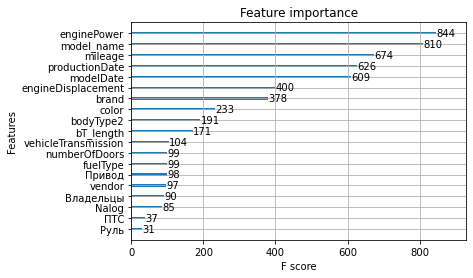

In [21]:
import matplotlib.pyplot as plt
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()